In [22]:
import os
import json
import pandas as pd
import numpy as np

In [6]:
file = './data/yt/watch_history.json'

In [10]:
with open('./data/yt/watch_history.json', encoding='utf8') as f:
    d = json.load(f)

In [14]:
len(d)

8892

In [25]:
wh = pd.DataFrame(d)

In [29]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            8892 non-null   object             
 1   title             8892 non-null   object             
 2   titleUrl          8892 non-null   object             
 3   subtitles         8714 non-null   object             
 4   time              8892 non-null   datetime64[ns, UTC]
 5   products          8892 non-null   object             
 6   activityControls  8892 non-null   object             
 7   details           44 non-null     object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 555.9+ KB


In [28]:
wh['time'] = pd.to_datetime(wh.time)

In [34]:
wh.products = wh.products.map(lambda x: x[0]) 

In [38]:
wh = wh.sort_values(by='time', ascending=False)

In [43]:
wh

,header,title,titleUrl,subtitles,time,products,activityControls,details,prev_vid
0,YouTube,Watched This Is Why Python Data Classes Are Aw...,https://www.youtube.com/watch?v=CvQ7e6yUtnw,"[{'name': 'ArjanCodes', 'url': 'https://www.yo...",2024-01-01 17:45:55.668000+00:00,YouTube,[YouTube watch history],NaN,2024-01-01 17:45:35.955000+00:00
1,YouTube,Watched I Analyzed 1000 Data Engineering Jobs ...,https://www.youtube.com/watch?v=XeVuJiitJ38,"[{'name': 'Sunjana in Data ', 'url': 'https://...",2024-01-01 17:45:35.955000+00:00,YouTube,[YouTube watch history],NaN,2024-01-01 17:44:31.587000+00:00
2,YouTube,Watched Gypsy Rose Blanchard set to be release...,https://www.youtube.com/watch?v=JsbYkaR_9L4,"[{'name': 'TODAY', 'url': 'https://www.youtube...",2024-01-01 17:44:31.587000+00:00,YouTube,[YouTube watch history],NaN,2024-01-01 17:44:29.049000+00:00
3,YouTube,Watched The Dirtiest Potatoes I’ve ever seen! ...,https://www.youtube.com/watch?v=suId7VE1rqI,"[{'name': 'Potato Ty', 'url': 'https://www.you...",2024-01-01 17:44:29.049000+00:00,YouTube,[YouTube watch history],NaN,2024-01-01 17:44:16.474000+00:00
4,YouTube,Watched The End 🥲😇😂 #viral #shorts #funny #fai...,https://www.youtube.com/watch?v=dyhtwTGNFzo,"[{'name': 'Letsdoeit', 'url': 'https://www.you...",2024-01-01 17:44:16.474000+00:00,YouTube,[YouTube watch history],NaN,2024-01-01 17:43:46.105000+00:00
...,...,...,...,...,...,...,...,...,...
8887,YouTube,Watched 1920x1080_video_AppIntro_Coffee_25s_EN...,https://www.youtube.com/watch?v=vAOOgvCaUkQ,NaN,2021-07-24 23:07:00.283000+00:00,YouTube,[YouTube watch history],[{'name': 'From Google Ads'}],2021-07-21 12:07:58.798000+00:00
8888,YouTube,Watched 009 468 WatchTogether CardiB ACi EN UA...,https://www.youtube.com/watch?v=O9wPiZe-f_k,NaN,2021-07-21 12:07:58.798000+00:00,YouTube,[YouTube watch history],[{'name': 'From Google Ads'}],2021-07-21 00:21:20.365000+00:00
8889,YouTube,Watched Labster Launch Promo Stomp Ad July,https://www.youtube.com/watch?v=Hd3xrBLNnCU,NaN,2021-07-21 00:21:20.365000+00:00,YouTube,[YouTube watch history],[{'name': 'From Google Ads'}],2021-02-13 04:53:26.866000+00:00
8890,YouTube,Watched BPAM 16x9 18s,https://www.youtube.com/watch?v=C8pKP4wLjpc,NaN,2021-02-13 04:53:26.866000+00:00,YouTube,[YouTube watch history],[{'name': 'From Google Ads'}],2020-05-12 22:54:11.667000+00:00


In [44]:
wh['time_elapsed'] = wh['time'] - wh['time'].shift(-1)

In [46]:
wh['dt'] = wh.time.dt.date

In [52]:
t = wh[wh.time_elapsed <= pd.Timedelta(1, 'H')].groupby(by=['dt'])['time_elapsed'].sum().reset_index()

In [65]:
import datetime

t = t[t.dt >= pd.to_datetime('2023-12-01')]

C:\Users\sande\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


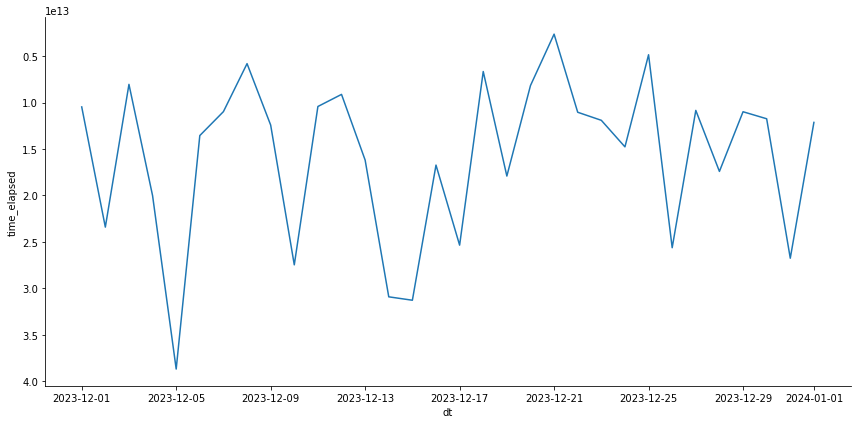

In [68]:
import seaborn as sns

sns.relplot(data=t
           , x='dt', y='time_elapsed'
           , kind='line'
           , height=6, aspect=2)

In [56]:
t['dt']

0     2021-07-24
1     2022-12-08
2     2022-12-09
3     2022-12-10
4     2023-03-16
5     2023-11-25
6     2023-11-26
7     2023-11-27
8     2023-11-28
9     2023-11-29
10    2023-11-30
11    2023-12-01
12    2023-12-02
13    2023-12-03
14    2023-12-04
15    2023-12-05
16    2023-12-06
17    2023-12-07
18    2023-12-08
19    2023-12-09
20    2023-12-10
21    2023-12-11
22    2023-12-12
23    2023-12-13
24    2023-12-14
25    2023-12-15
26    2023-12-16
27    2023-12-17
28    2023-12-18
29    2023-12-19
30    2023-12-20
31    2023-12-21
32    2023-12-22
33    2023-12-23
34    2023-12-24
35    2023-12-25
36    2023-12-26
37    2023-12-27
38    2023-12-28
39    2023-12-29
40    2023-12-30
41    2023-12-31
42    2024-01-01
Name: dt, dtype: object